# Spotipy
First we import the spotipy library to easily interface with the Spotify API, and <b>get the saved tracks</b>

In [34]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id="data",
                                                           client_secret="data",
                                                           redirect_uri="http://localhost:8888/callback",
                                                           scope="user-library-read"))
results = sp.current_user_saved_tracks(limit=50)


Get track names 

In [35]:
#get the track names from the results
track_names = []
for item in results['items']:
    track = item['track']
    track_names.append(track['name'])

print(track_names)


['Listen Here', 'Poetry', 'Alright', 'Drop', "Don't Sweat The Technique", 'Crank It Up', 'Down The Line', 'Cherry Wine', 'Oil Slick', 'Sando', 'Bella', 'Therapy pt. 2 [Feat. Mac Miller]', 'Dark Side Riddim', 'Music in the Village', 'Fonkadelica', 'Stuck In The Middle', 'Hip to Bop', 'Serendipity', 'Digital Cowboy', 'Umi Says', 'Ready Set', 'Raid', "Award Tour (We Gettin' Down)", 'Check the Rhime', "Let's Ride", 'Figaro', 'library of the universe', 'Sour Soul', 'Pretty Visitors', 'Indagine Su Un Cittadino Al Di Sopra Di Ogni Sospetto', 'Serenade To A Cuckoo', 'Barbosa', 'Song For My Father', 'Point Of No Return', 'Comedown', 'S.P.A.C.E.', 'Notte In Bovisa', 'Every Time I See You', 'Lonely Soul', 'Nardis', 'Sun Bath', 'BR Blues', 'Saint Vibe and Time', 'Righteous Energy', 'Memory Box', 'A Chunk of Sugar', 'The Star Room', 'Ego Killah', 'Just Playing (Dreams) - 2005 Remaster', 'SING WITHOUT YOU']


Get first track info to know what info can be shown

In [36]:
#get music features from the results
track_features = []
for item in results['items']:
    track = item['track']
    track_features.append(sp.audio_features(track['id']))



## plotting data

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#convert all the features into a dataframe, NOT JUST THE FIRST
df=[]
for i in range(len(track_features)):
    df.append(pd.DataFrame(track_features[i]))
df = pd.concat(df)


In [38]:
print(df.head())

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.508   0.698    8    -9.450     1       0.0767       0.02070   
0         0.749   0.501    0   -10.441     1       0.1700       0.20900   
0         0.796   0.766    7    -5.974     1       0.2380       0.07420   
0         0.853   0.754   10    -7.158     0       0.2590       0.33500   
0         0.737   0.890    4    -8.443     1       0.1580       0.00556   

   instrumentalness  liveness  valence    tempo            type  \
0          0.846000    0.0724    0.845  152.726  audio_features   
0          0.097300    0.3040    0.400   89.965  audio_features   
0          0.000000    0.0827    0.558  110.034  audio_features   
0          0.000006    0.2520    0.690   95.081  audio_features   
0          0.001710    0.0801    0.809  105.848  audio_features   

                       id                                   uri  \
0  5bT2r4HPHXhLGpt1ibcViH  spotify:track:5bT2r4HPHXhLGpt1ibcViH   
0  3nSECoLmC

array([[<AxesSubplot: title={'center': 'danceability'}>,
        <AxesSubplot: title={'center': 'energy'}>,
        <AxesSubplot: title={'center': 'key'}>,
        <AxesSubplot: title={'center': 'loudness'}>],
       [<AxesSubplot: title={'center': 'mode'}>,
        <AxesSubplot: title={'center': 'speechiness'}>,
        <AxesSubplot: title={'center': 'acousticness'}>,
        <AxesSubplot: title={'center': 'instrumentalness'}>],
       [<AxesSubplot: title={'center': 'liveness'}>,
        <AxesSubplot: title={'center': 'valence'}>,
        <AxesSubplot: title={'center': 'tempo'}>,
        <AxesSubplot: title={'center': 'duration_ms'}>],
       [<AxesSubplot: title={'center': 'time_signature'}>,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

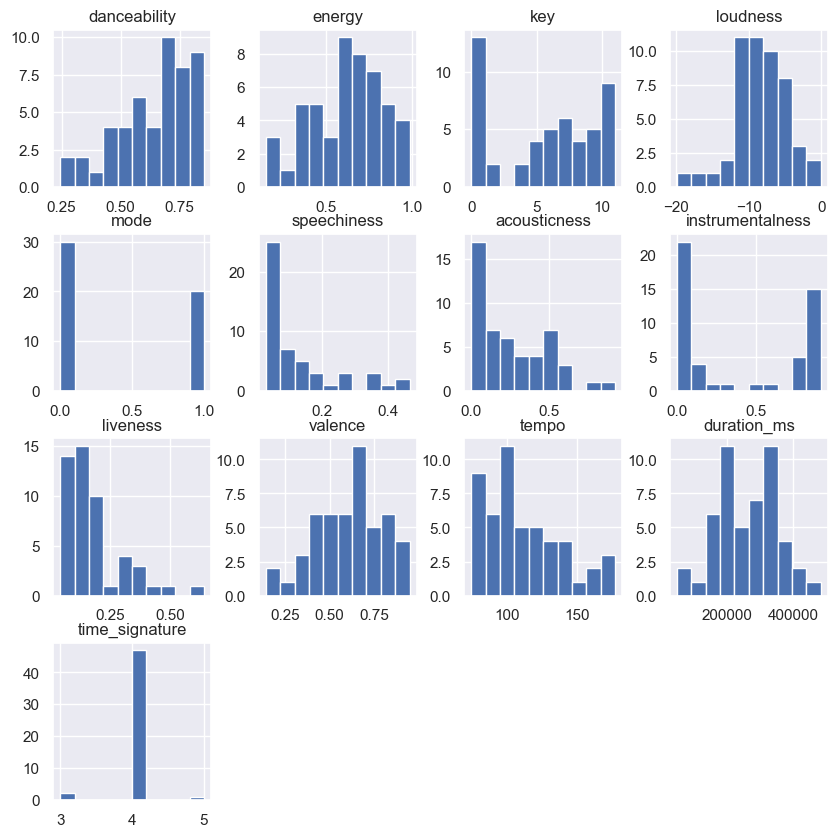

In [40]:
#plot mean for each feature
df.hist(figsize=(10,10))

C:\Users\gnele\AppData\Local\Temp\ipykernel_12092\545886230.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

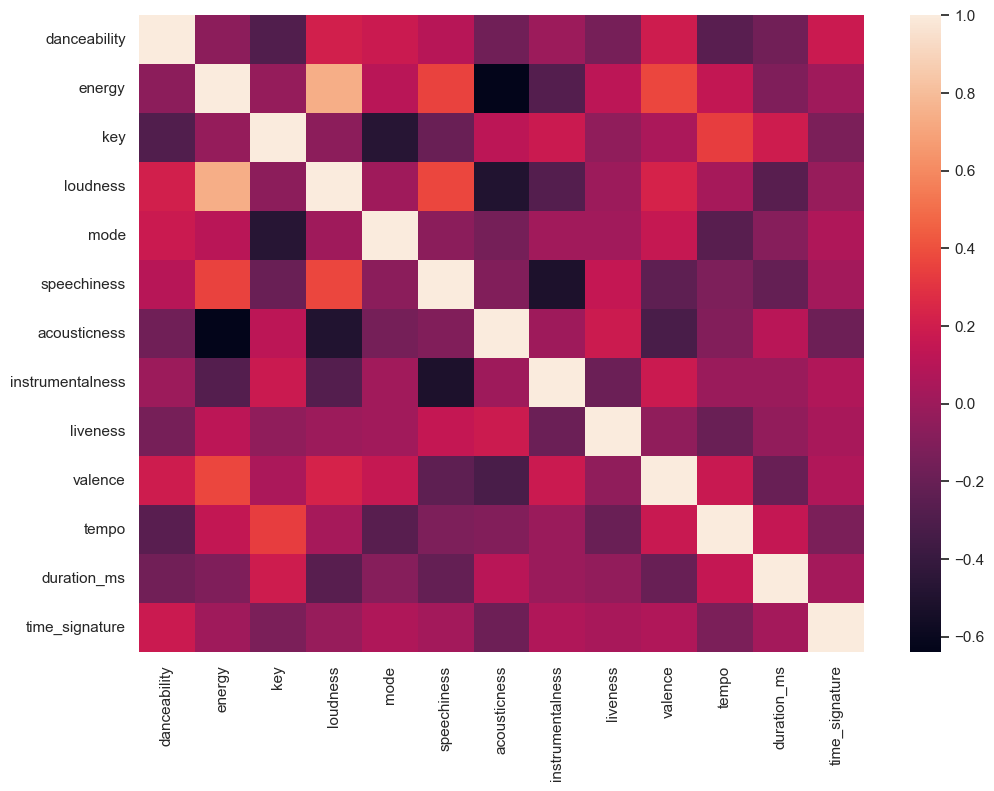

In [41]:
#show correlation between features
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
            